## Tratamiento de la variable de salida historica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
pd.options.display.max_columns = 120
from datetime import timedelta
import seaborn as sns
import glob as glob
from datetime import datetime

## Creación e variable indicadora de pago

In [2]:
# pd.read_excel('C:/Users/scadacat/Desktop/Cobranzas_salida/2019/Cobranzas\\Informe Operación UNE Cobranzas Cartera Especial Abril 2019.xlsb',engine='openpyxl',dtype=str)
# dat_2019 = pd.DataFrame()
# for f in glob.glob(r"C:\Users\scadacat\Desktop\Cobranzas_salida\2019\Cobranzas\*.xlsb"):
#     df = pd.read_excel(f,engine='pyxlsb',dtype=str,sheet_name='BD_PAGO')
#     dat_2019 = dat_2019.append(df,ignore_index=True)

In [3]:
dat_2020_1 = pd.DataFrame()
for f in glob.glob(r"C:\Users\scadacat\Desktop\Cobranzas_salida\2020\*.xlsb"):
    df = pd.read_excel(f,engine='pyxlsb',dtype=str,sheet_name='BD_PAGO')
    dat_2020_1 = dat_2020_1.append(df,ignore_index=True)

In [4]:
dat_2020_2 = pd.DataFrame()
for f in glob.glob(r"C:\Users\scadacat\Desktop\Cobranzas_salida\2020\Nueva carpeta\*.xlsb"):
    df = pd.read_excel(f,engine='pyxlsb',dtype=str,sheet_name='BD_PAGO')
    dat_2020_2 = dat_2020_2.append(df,ignore_index=True)

In [5]:
dat_2021 = pd.DataFrame()
for f in glob.glob(r"C:\Users\scadacat\Desktop\Cobranzas_salida\2021\*.xlsb"):
    df = pd.read_excel(f,engine='pyxlsb',sheet_name='BD_PAGO',dtype=str)
    dat_2021 = dat_2021.append(df,ignore_index=True)

In [6]:
seguimiento=pd.concat([dat_2020_1,dat_2020_2,dat_2021],ignore_index=True)

In [7]:
seguimiento=seguimiento.dropna(subset=['Identificacion Del Cliente'])

In [8]:
seguimiento.drop(['Unnamed: 19'],axis=1,inplace=True)
seguimiento['Vector'].fillna('SIN VECTOR',inplace= True)
seguimiento['% Pago Pendiente'].isna().sum()

229550

In [9]:
seguimiento['Fecha_Gestion']=seguimiento['Fecha_Gestion'].astype('int')
seguimiento['Fecha_Gestion']=pd.to_datetime(seguimiento['Fecha_Gestion'],unit='D',origin='1899-12-30')
seguimiento['Fecha_Pago']=seguimiento['Fecha_Pago'].fillna(0).astype(int)
seguimiento['Fecha_Pago']=pd.to_datetime(seguimiento['Fecha_Pago'],
                                          unit='D',origin='1899-12-30',errors='coerce')

In [10]:
seguimiento['Fecha_Pago']=pd.to_datetime(seguimiento['Fecha_Pago'].\
                                         astype(str).str.replace('1899-12-30','NaT'),format='%Y-%m-%d',
                                         errors='coerce')

In [11]:
seguimiento['Ano']=seguimiento['Fecha_Gestion'].dt.year
seguimiento['mes']=seguimiento['Fecha_Gestion'].dt.month
seguimiento['dia']=seguimiento['Fecha_Gestion'].dt.day

In [12]:
seguimiento['dia_pago']=seguimiento['Fecha_Pago'].dt.day

In [13]:
seguimiento.sort_values(['Identificacion Del Cliente','Fecha_Gestion'],inplace=True)

In [14]:
seguim=seguimiento[seguimiento['Repetido CC']=='0']
seguim=seguim[~seguim.duplicated(keep='last')]

In [15]:
cant_contactos=seguim.groupby(['Ano','mes','Identificacion Del Cliente']).size().\
                            reset_index(name="cantidad_mes")
cant_contactos2=seguim.groupby(['Identificacion Del Cliente']).size().\
                            reset_index(name="cantidad_hist")
seg_2=pd.merge(seguim,cant_contactos,
               on=['Ano','mes','Identificacion Del Cliente'])\
                .merge(cant_contactos2,on='Identificacion Del Cliente')

In [16]:
seg_2['Efectivo Pago'].value_counts(True)

No Efectivo    0.51187
Efectivo       0.48813
Name: Efectivo Pago, dtype: float64

<AxesSubplot:xlabel='CICLO', ylabel='dia_pago'>

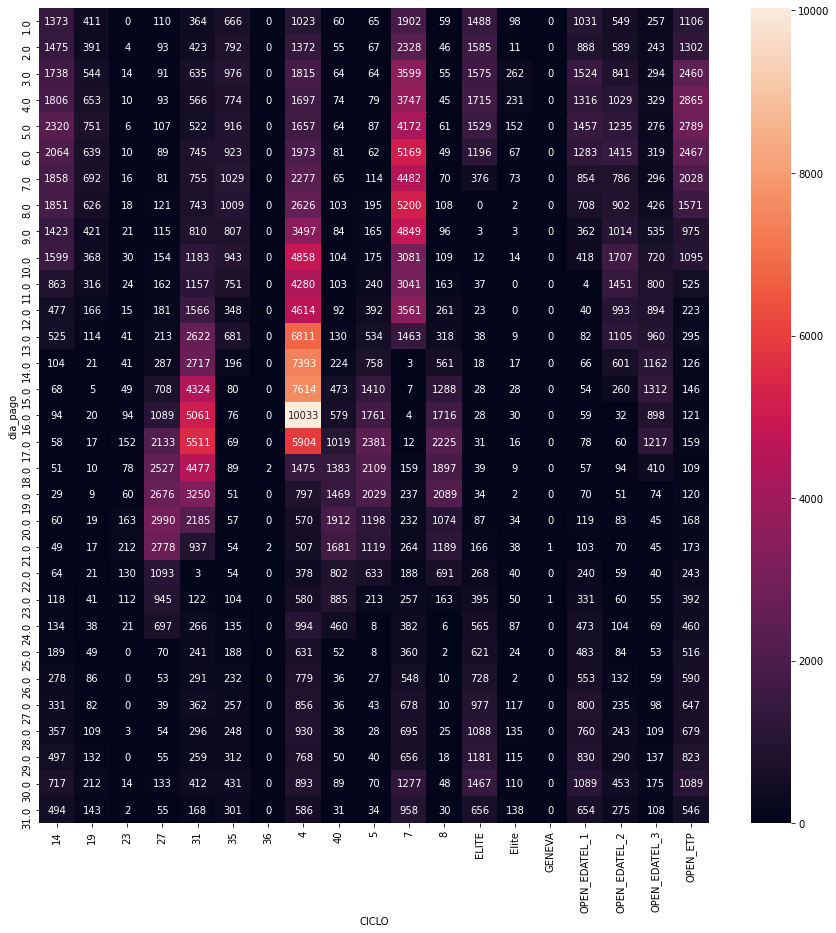

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(pd.crosstab(seg_2['dia_pago'],seg_2['CICLO']),annot=True,fmt="d")

In [18]:
seg_2.head()

,Identificacion Del Cliente,Grabador,Fecha_Gestion,CICLO,PrimeroDeResultado de gestion,SumaDeValor Pendiente,SumaDeValor Vencido,Fecha_Pago,SumaDeValor Pagado,Tipo Efectivo,Vector,% Pago Pendiente,% Pago Vencido,Dias Pago,Pago,Repetido,Efectivo Pago,Repetido CC,Vlr_Recuperado,Ano,mes,dia,dia_pago,cantidad_mes,cantidad_hist
0,1000000740,mbolivar,2020-01-17,4,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,163349,163349,NaT,NaN,50,MALO,NaN,NaN,-43847,En deuda,0,No Efectivo,0,NaN,2020,1,17,NaN,1,2
1,1000000740,cmortiz,2020-06-03,4,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,129432,66368,2020-06-04,70000,50,SIN VECTOR,0.54,1,1,Pago,0,Efectivo,0,70000,2020,6,3,4.0,1,2
2,1000000815,mruizram,2020-07-10,7,NO CONTESTAN / OCUPADO,151762,75881,NaT,NaN,99,SIN VECTOR,NaN,NaN,-44022,En deuda,0,No Efectivo,0,NaN,2020,7,10,NaN,1,1
3,1000000832,kpolopet,2020-08-28,7,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,218494,97850,2020-08-31,120000,50,SIN VECTOR,0.55,1,3,Pago,0,Efectivo,0,120000,2020,8,28,31.0,1,2
4,1000000832,jmoyapen,2020-10-24,7,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,215586,96988,2020-11-10,120000,50,SIN VECTOR,0.56,1,17,Pago,0,Efectivo,0,120000,2020,10,24,10.0,1,2


<AxesSubplot:>

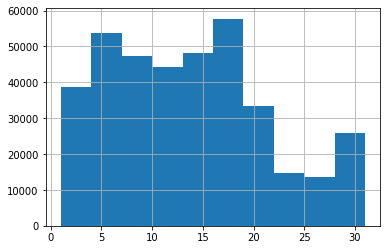

In [19]:
seg_2['dia_pago'].hist()

In [20]:
seg_2.head()

,Identificacion Del Cliente,Grabador,Fecha_Gestion,CICLO,PrimeroDeResultado de gestion,SumaDeValor Pendiente,SumaDeValor Vencido,Fecha_Pago,SumaDeValor Pagado,Tipo Efectivo,Vector,% Pago Pendiente,% Pago Vencido,Dias Pago,Pago,Repetido,Efectivo Pago,Repetido CC,Vlr_Recuperado,Ano,mes,dia,dia_pago,cantidad_mes,cantidad_hist
0,1000000740,mbolivar,2020-01-17,4,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,163349,163349,NaT,NaN,50,MALO,NaN,NaN,-43847,En deuda,0,No Efectivo,0,NaN,2020,1,17,NaN,1,2
1,1000000740,cmortiz,2020-06-03,4,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,129432,66368,2020-06-04,70000,50,SIN VECTOR,0.54,1,1,Pago,0,Efectivo,0,70000,2020,6,3,4.0,1,2
2,1000000815,mruizram,2020-07-10,7,NO CONTESTAN / OCUPADO,151762,75881,NaT,NaN,99,SIN VECTOR,NaN,NaN,-44022,En deuda,0,No Efectivo,0,NaN,2020,7,10,NaN,1,1
3,1000000832,kpolopet,2020-08-28,7,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,218494,97850,2020-08-31,120000,50,SIN VECTOR,0.55,1,3,Pago,0,Efectivo,0,120000,2020,8,28,31.0,1,2
4,1000000832,jmoyapen,2020-10-24,7,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,215586,96988,2020-11-10,120000,50,SIN VECTOR,0.56,1,17,Pago,0,Efectivo,0,120000,2020,10,24,10.0,1,2


In [21]:
seg_2['Dias Pago']=seg_2['Dias Pago'].astype('int')
seg_2['Dias Pago'][seg_2['Dias Pago'] < 0] = np.nan
seg_2['Dias Pago_class'] = pd.cut(x=seg_2['Dias Pago'],
                             bins=[0,5,10,15,20,25,30,1000], 
                             labels=["0-5","6-10","11-15","16-20","21-25", "26-30", ">30"])
seg_2['Dias Pago_class']=seg_2['Dias Pago_class'].astype(str).fillna('SIN PAGO')

C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
seg_2['Dias_de Pago_class'] = pd.cut(x=seg_2['dia_pago'],
                             bins=[0,5,10,15,20,25,31], 
                             labels=["Dia 0-5","Dia 6-10","Dia 11-15","Dia 16-20","Dia 21-25", "Dia 26-31"])
seg_2['Dias_de Pago_class']=seg_2['Dias_de Pago_class'].astype(str).fillna('SIN PAGO_dia')

<AxesSubplot:>

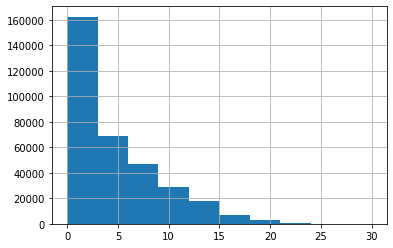

In [23]:
seg_2['Dias Pago'].hist()

In [24]:
seg_2[seg_2['Identificacion Del Cliente']=='1072654344']

,Identificacion Del Cliente,Grabador,Fecha_Gestion,CICLO,PrimeroDeResultado de gestion,SumaDeValor Pendiente,SumaDeValor Vencido,Fecha_Pago,SumaDeValor Pagado,Tipo Efectivo,Vector,% Pago Pendiente,% Pago Vencido,Dias Pago,Pago,Repetido,Efectivo Pago,Repetido CC,Vlr_Recuperado,Ano,mes,dia,dia_pago,cantidad_mes,cantidad_hist,Dias Pago_class,Dias_de Pago_class
151044,1072654344,tlopezza,2020-08-18,4,NO CONTESTAN / OCUPADO,204884,102442,NaT,NaN,99,SIN VECTOR,NaN,NaN,NaN,En deuda,0,No Efectivo,0,NaN,2020,8,18,NaN,1,2,SIN PAGO,SIN PAGO_dia
151045,1072654344,oealvarez,2021-03-16,4,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,205402,101683,2021-03-16,103683,50,SIN VECTOR,0.5,1,0.0,Pago,0,Efectivo,0,103683,2021,3,16,16.0,1,2,SIN PAGO,Dia 16-20


In [25]:
seg_2['Vector']=seg_2['Vector'].str.upper()

In [26]:
seg_2['SumaDeValor Pendiente']=seg_2['SumaDeValor Pendiente'].astype('float')
seg_2['SumaDeValor Vencido']=seg_2['SumaDeValor Vencido'].astype('float')
seg_2['Efectivo Pago_hist'] = np.where(seg_2['Efectivo Pago']=="Efectivo",1,0)

In [27]:
conteo_ges=seg_2['PrimeroDeResultado de gestion'].value_counts().iloc[:10].index.tolist()
conteo_ges=['SE DEJO MENSAJE EN BUZON','DEUDOR REALIZA PROMESA DE PAGO TOTAL','DEUDOR REALIZA PROMESA DE PAGO PARCIAL',
 'NO CONTESTAN / OCUPADO','NO HUBO ACUERDO','SE DEJO MENSAJE CON TERCERO']
seg_2['PrimeroDeResultado de gestion_des']=seg_2.apply(
    lambda row: row['PrimeroDeResultado de gestion']  if (row['PrimeroDeResultado de gestion'] in conteo_ges)
     else 'OTRA GESTION',axis=1)

In [28]:
seg_2_=pd.concat([seg_2,pd.get_dummies(seg_2['Dias Pago_class']),
                  pd.get_dummies(seg_2['Dias_de Pago_class']),
                  pd.get_dummies(seg_2['PrimeroDeResultado de gestion_des'])],axis=1) # Concateno

In [29]:
seg_2_['% Pago Pendiente'].fillna(1,inplace=True)
seg_2_['% Pago Pendiente']=seg_2_['% Pago Pendiente'].astype(float)
seg_2_['% Pago Pendiente'][seg_2_['% Pago Pendiente'] > 1] = 1
seg_2_['% Pago pagado']=1-seg_2_['% Pago Pendiente']

C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
consolidado_total =\
seg_2_.groupby("Identificacion Del Cliente",as_index=False).agg({"Efectivo Pago_hist":"sum",'Dias Pago':'mean',
                                                                 "0-5":'sum','6-10':'sum',
                                                                 "11-15":'sum',"16-20":'sum',
                                                                 "21-25":'sum','26-30':'sum',"SIN PAGO":'sum',
                                                                 "Dia 11-15":'sum', "Dia 26-31":"sum", "Dia 0-5":"sum",
                                                                 "Dia 16-20":"sum",'Dia 21-25':'sum', 'Dia 6-10':'sum',
                                                                 "SIN PAGO_dia":"sum",
                                                                 'DEUDOR REALIZA PROMESA DE PAGO PARCIAL':'sum',
                                                                 'DEUDOR REALIZA PROMESA DE PAGO TOTAL':'sum', 
                                                                 'NO CONTESTAN / OCUPADO':'sum','NO HUBO ACUERDO':'sum', 
                                                                 'OTRA GESTION':'sum', 'SE DEJO MENSAJE CON TERCERO':'sum',
                                                                 'SE DEJO MENSAJE EN BUZON':'sum','% Pago pagado':'mean'
                                                                }).\
    rename(columns={'Efectivo Pago_hist':"efectivos_hist",'Dias Pago':'Dias Pago_mean','% Pago pagado':'% Pago pagado_medio'})
cer1=pd.merge(seg_2_.drop(['0-5','11-15', '16-20', '21-25', '26-30', 
                '6-10', 'SIN PAGO','0-5', '11-15', '16-20', '21-25', '26-30', '6-10','SIN PAGO',         
                'Dia 11-15', 'Dia 16-20', 'Dia 21-25','Dia 0-5', 
                'Dia 26-31', 'Dia 6-10', 'SIN PAGO_dia','DEUDOR REALIZA PROMESA DE PAGO PARCIAL',
                'DEUDOR REALIZA PROMESA DE PAGO TOTAL', 'NO CONTESTAN / OCUPADO',
                'NO HUBO ACUERDO', 'OTRA GESTION', 'SE DEJO MENSAJE CON TERCERO',
                'SE DEJO MENSAJE EN BUZON'],axis=1)
              ,consolidado_total,on='Identificacion Del Cliente')

In [31]:
cer1=cer1.sort_values(['Identificacion Del Cliente','Fecha_Gestion','Efectivo Pago'],ascending=[True,True,True]).drop_duplicates('Identificacion Del Cliente',keep='last')

In [33]:
cer1.head()

,Identificacion Del Cliente,Grabador,Fecha_Gestion,CICLO,PrimeroDeResultado de gestion,SumaDeValor Pendiente,SumaDeValor Vencido,Fecha_Pago,SumaDeValor Pagado,Tipo Efectivo,Vector,% Pago Pendiente,% Pago Vencido,Dias Pago,Pago,Repetido,Efectivo Pago,Repetido CC,Vlr_Recuperado,Ano,mes,dia,dia_pago,cantidad_mes,cantidad_hist,Dias Pago_class,Dias_de Pago_class,Efectivo Pago_hist,PrimeroDeResultado de gestion_des,% Pago pagado,efectivos_hist,Dias Pago_mean,0-5,6-10,11-15,16-20,21-25,26-30,SIN PAGO,Dia 11-15,Dia 26-31,Dia 0-5,Dia 16-20,Dia 21-25,Dia 6-10,SIN PAGO_dia,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,DEUDOR REALIZA PROMESA DE PAGO TOTAL,NO CONTESTAN / OCUPADO,NO HUBO ACUERDO,OTRA GESTION,SE DEJO MENSAJE CON TERCERO,SE DEJO MENSAJE EN BUZON,% Pago pagado_medio
1,1000000740,cmortiz,2020-06-03,4,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,129432.0,66368.0,2020-06-04,70000,50,SIN VECTOR,0.540000,1,1.0,Pago,0,Efectivo,0,70000,2020,6,3,4.0,1,2,0-5,Dia 0-5,1,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,0.460000,1,1.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0.230000
2,1000000815,mruizram,2020-07-10,7,NO CONTESTAN / OCUPADO,151762.0,75881.0,NaT,NaN,99,SIN VECTOR,1.000000,NaN,NaN,En deuda,0,No Efectivo,0,NaN,2020,7,10,NaN,1,1,SIN PAGO,SIN PAGO_dia,0,NO CONTESTAN / OCUPADO,0.000000,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.000000
4,1000000832,jmoyapen,2020-10-24,7,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,215586.0,96988.0,2020-11-10,120000,50,SIN VECTOR,0.560000,1,17.0,Pago,0,Efectivo,0,120000,2020,10,24,10.0,1,2,16-20,Dia 6-10,1,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,0.440000,2,10.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,0,0,0.445000
5,1000001473,equintega,2020-05-05,OPEN_EDATEL_1,SE DEJO MENSAJE EN BUZON,161539.0,161539.0,NaT,NaN,50,MALO,1.000000,NaN,NaN,En deuda,0,No Efectivo,0,NaN,2020,5,5,NaN,1,1,SIN PAGO,SIN PAGO_dia,0,SE DEJO MENSAJE EN BUZON,0.000000,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.000000
8,1000001571,equintega,2020-02-19,31,DEUDOR REALIZA PROMESA DE PAGO TOTAL,135602.0,135602.0,2020-02-19,46000,50,REGULAR,0.339228,0.33922803498473475,0.0,Pago,0,Efectivo,0,46000,2020,2,19,19.0,1,3,SIN PAGO,Dia 16-20,1,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0.660772,1,0.0,0,0,0,0,0,0,3,0,2,0,1,0,0,0,0,1,0,0,0,2,0,0.514349


In [34]:
cer1['% Pago pagado_class']=pd.cut(cer1['% Pago pagado'], [0,0.15,0.3,0.5,0.75,1.01],labels=["Menor al 15%","Entre el 15 y el 30%","Entre el 30 y el 50%","Entre el 50% y el 75%","Más del 75%"],right=False)

In [35]:
cer1.head()

,Identificacion Del Cliente,Grabador,Fecha_Gestion,CICLO,PrimeroDeResultado de gestion,SumaDeValor Pendiente,SumaDeValor Vencido,Fecha_Pago,SumaDeValor Pagado,Tipo Efectivo,Vector,% Pago Pendiente,% Pago Vencido,Dias Pago,Pago,Repetido,Efectivo Pago,Repetido CC,Vlr_Recuperado,Ano,mes,dia,dia_pago,cantidad_mes,cantidad_hist,Dias Pago_class,Dias_de Pago_class,Efectivo Pago_hist,PrimeroDeResultado de gestion_des,% Pago pagado,efectivos_hist,Dias Pago_mean,0-5,6-10,11-15,16-20,21-25,26-30,SIN PAGO,Dia 11-15,Dia 26-31,Dia 0-5,Dia 16-20,Dia 21-25,Dia 6-10,SIN PAGO_dia,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,DEUDOR REALIZA PROMESA DE PAGO TOTAL,NO CONTESTAN / OCUPADO,NO HUBO ACUERDO,OTRA GESTION,SE DEJO MENSAJE CON TERCERO,SE DEJO MENSAJE EN BUZON,% Pago pagado_medio,% Pago pagado_class
1,1000000740,cmortiz,2020-06-03,4,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,129432.0,66368.0,2020-06-04,70000,50,SIN VECTOR,0.540000,1,1.0,Pago,0,Efectivo,0,70000,2020,6,3,4.0,1,2,0-5,Dia 0-5,1,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,0.460000,1,1.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0.230000,Entre el 30 y el 50%
2,1000000815,mruizram,2020-07-10,7,NO CONTESTAN / OCUPADO,151762.0,75881.0,NaT,NaN,99,SIN VECTOR,1.000000,NaN,NaN,En deuda,0,No Efectivo,0,NaN,2020,7,10,NaN,1,1,SIN PAGO,SIN PAGO_dia,0,NO CONTESTAN / OCUPADO,0.000000,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.000000,Menor al 15%
4,1000000832,jmoyapen,2020-10-24,7,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,215586.0,96988.0,2020-11-10,120000,50,SIN VECTOR,0.560000,1,17.0,Pago,0,Efectivo,0,120000,2020,10,24,10.0,1,2,16-20,Dia 6-10,1,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,0.440000,2,10.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,0,0,0.445000,Entre el 30 y el 50%
5,1000001473,equintega,2020-05-05,OPEN_EDATEL_1,SE DEJO MENSAJE EN BUZON,161539.0,161539.0,NaT,NaN,50,MALO,1.000000,NaN,NaN,En deuda,0,No Efectivo,0,NaN,2020,5,5,NaN,1,1,SIN PAGO,SIN PAGO_dia,0,SE DEJO MENSAJE EN BUZON,0.000000,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.000000,Menor al 15%
8,1000001571,equintega,2020-02-19,31,DEUDOR REALIZA PROMESA DE PAGO TOTAL,135602.0,135602.0,2020-02-19,46000,50,REGULAR,0.339228,0.33922803498473475,0.0,Pago,0,Efectivo,0,46000,2020,2,19,19.0,1,3,SIN PAGO,Dia 16-20,1,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0.660772,1,0.0,0,0,0,0,0,0,3,0,2,0,1,0,0,0,0,1,0,0,0,2,0,0.514349,Entre el 50% y el 75%


In [36]:
cer1.shape

(383403, 55)

In [37]:
cer1.to_csv(r'C:\Users\scadacat\Desktop\TIGO (Cliente)\Cobranzas\Exportes de Bd_cobranzas\resumen_salida_v2.csv',encoding='utf-8',sep=';',index=False)

In [38]:
### serie de tiempo de efectivos

In [39]:
seguim.head(1)

,Identificacion Del Cliente,Grabador,Fecha_Gestion,CICLO,PrimeroDeResultado de gestion,SumaDeValor Pendiente,SumaDeValor Vencido,Fecha_Pago,SumaDeValor Pagado,Tipo Efectivo,Vector,% Pago Pendiente,% Pago Vencido,Dias Pago,Pago,Repetido,Efectivo Pago,Repetido CC,Vlr_Recuperado,Ano,mes,dia,dia_pago
352959,1000000740,mbolivar,2020-01-17,4,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,163349,163349,NaT,NaN,50,MALO,NaN,NaN,-43847,En deuda,0,No Efectivo,0,NaN,2020,1,17,NaN


In [40]:
seguim.sort_values('Fecha_Gestion',ascending='True',inplace=True)

In [41]:
seguim[seguim['Identificacion Del Cliente']=='41421962']

,Identificacion Del Cliente,Grabador,Fecha_Gestion,CICLO,PrimeroDeResultado de gestion,SumaDeValor Pendiente,SumaDeValor Vencido,Fecha_Pago,SumaDeValor Pagado,Tipo Efectivo,Vector,% Pago Pendiente,% Pago Vencido,Dias Pago,Pago,Repetido,Efectivo Pago,Repetido CC,Vlr_Recuperado,Ano,mes,dia,dia_pago
318163,41421962,rorregbe,2019-12-23,4,DEUDOR REALIZA PROMESA DE PAGO TOTAL,226540,226540,2020-01-03,113000,50,REGULAR,0.5,0,11,Pago,0,Efectivo,0,113000,2019,12,23,3.0
339405,41421962,rorregbe,2019-12-23,4,DEUDOR REALIZA PROMESA DE PAGO TOTAL,226540,226540,2020-01-03,113000,50,REGULAR,0.4988081574997793,0.4988081574997793,11,Pago,0,Efectivo,0,113000,2019,12,23,3.0
1181811,41421962,jmoyapen,2020-09-17,4,YA PAGO,258842,128421,2020-09-17,130421,50,SIN VECTOR,0.5,1,0,Pago,0,Efectivo,0,130421,2020,9,17,17.0


In [42]:
seguimexp=seguim.sort_values(['Identificacion Del Cliente','Fecha_Gestion','Efectivo Pago'],ascending=[True,True,True]).drop_duplicates('Identificacion Del Cliente',keep='last')

In [43]:
expo=seguimexp.groupby([pd.Grouper(key='Fecha_Gestion',freq='d'),'Efectivo Pago']).agg({'Identificacion Del Cliente':'nunique'})

In [44]:
expo=expo.reset_index()

In [45]:
expo.to_csv(r'C:\Users\scadacat\Desktop\TIGO (Cliente)\Cobranzas\Exportes de Bd_cobranzas\resumen_salida_v2_serie.csv',encoding='utf-8',sep=';',index=False)

### Fin del notebook

In [ ]:
seguim['Tipo Efectivo'].unique()

In [ ]:
#seguimiento['Fecha_Pago']
#pd.to_numeric(seguimiento['Fecha_Pago'], errors='coerce')
#pd.to_datetime(seguimiento['Fecha_Pago'].astype('int'),unit='D',origin='1889-12-30', errors='coerce')
#pd.to_datetime(seguimiento['Fecha_Pago'].astype('int'),unit='D',origin='1889-12-30', errors='coerce')
#pd.to_datetime(seguimiento['Fecha_Gestion'].fillna(0),unit='D',origin='1889-12-30')
#pd.to_datetime(seguimiento['Fecha_Pago'],unit='D',origin='1889-12-30',errors = "coerce")
#seguimiento['Fecha_Pago']=pd.to_datetime(seguimiento['Fecha_Pago'],unit='D',origin='1889-12-30',errors = "coerce")
#seguimiento
#pd.to_numeric(df[col],errors='coerce')
#seguimiento.groupby(['Identificacion Del Cliente']).agg({'PrimeroDeResultado de gestion':np.array,'TOIP':'sum','UNEMOVIL':'sum'}).reset_index()
#seguimiento
#seguimiento['PrimeroDeResultado de gestion']

In [ ]:
seguim

In [ ]:
seguimiento=seguimiento.dropna(subset=['Fecha_Pago'])
seguimiento['Fecha_Gestion']=seguimiento['Fecha_Gestion'].astype('int')

In [ ]:
cer1.head(2)

In [ ]:
seguimiento[seguimiento['Identificacion Del Cliente']=='99999999908777']

In [ ]:
# pd.to_datetime(seguimiento['Fecha_Gestion'])
# seguimiento.Fecha_Gestion.astype(int).map(dt.datetime.fromordinal)
# seguimiento.Fecha_Gestion.apply(lambda x: datetime.fromordinal(x)).dt.strftime('%d-%m-%Y',errors = "coerce")
# pd.to_datetime(seguimiento["Fecha_Gestion"], format='%f%b%Y')
# seguimiento["Fecha_Gestion"] = pd.to_datetime(seguimiento["Fecha_Gestion"], format='%f%b%Y')
# seguimiento['Fecha_Gestion'] =  seguimiento.Fecha_Gestion.apply(lambda x: dt.fromordinal(x)).dt.strftime('%d-%m-%Y',errors = "coerce")
# cer1
# seguimiento[~seguimiento[['Identificacion Del Cliente','SumaDeValor Pendiente','SumaDeValor Vencido','SumaDeValor Pagado']].duplicated(keep='last')]
# df[df[['Identificacion Del Cliente','SumaDeValor Pendiente','SumaDeValor Vencido','SumaDeValor Pagado']].duplicated(keep='last')]
# seguimiento[~seguimiento.duplicated(keep='last')].sort_values(['Identificacion Del Cliente','Fecha_Gestion'])#.drop_duplicates('Identificacion Del Cliente',keep='last')
# seguimiento[~seguimiento.duplicated(keep='last')].sort_values(['Identificacion Del Cliente','Fecha_Gestion'])
# ## Concateno variables
# ## Me quedo con las variables que están en enero solamente dado que hay multiples mal escritas y no son consistentes entre Bds
# columns_util2 = list(set(seguimiento.columns)- set(ene.columns))
# seguimiento.drop(columns_util2,axis=1,inplace=True)
# cer1.value_counts()

In [ ]:
cer1[cer1['PrimeroDeResultado de gestion']=='YA PAGO']['Efectivo Pago'].value_counts()